# Import All Lib

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

# Load the Dataset

In [11]:
BASE_DIR = '/kaggle/input/utkface-new/UTKFace/'


In [12]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in sorted(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

In [13]:
age_labels[1]

100

In [14]:
# convert to dataframe
df = pd.DataFrame({'img':image_paths ,  'age':age_labels,'gender':gender_labels})
df.head()


,img,age,gender
0,/kaggle/input/utkface-new/UTKFace/100_0_0_2017...,100,0
1,/kaggle/input/utkface-new/UTKFace/100_0_0_2017...,100,0
2,/kaggle/input/utkface-new/UTKFace/100_1_0_2017...,100,1
3,/kaggle/input/utkface-new/UTKFace/100_1_0_2017...,100,1
4,/kaggle/input/utkface-new/UTKFace/100_1_0_2017...,100,1


# Exploratory Data Analysis

<Axes: xlabel='age', ylabel='Density'>

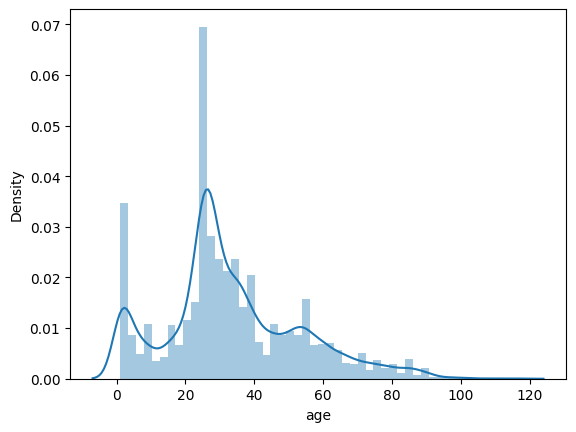

In [15]:
sns.distplot(df['age'])


In [16]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

<Axes: xlabel='gender', ylabel='count'>

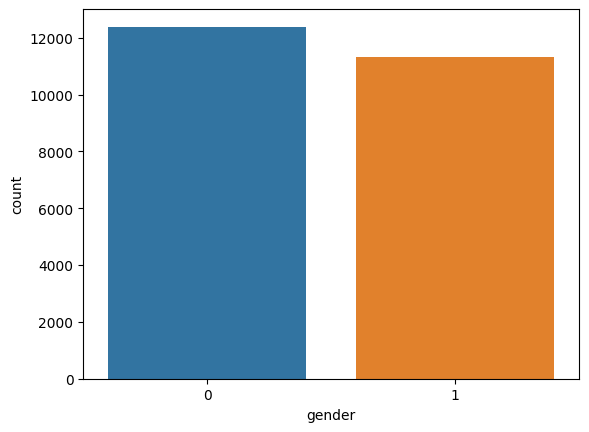

In [18]:
sns.countplot(x=df["gender"])

# Feature Extraction

In [19]:
import cv2

In [29]:
import cv2
import numpy as np

def extract_features(images):
    features = []
    for image_path in range(10000): # Loop through the elements of the Series
        # print(image_path) /kaggle/input/utkface-new/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg phle image h
        img = cv2.imread(images[image_path])
        img = cv2.resize(img, (128, 128))
        img = np.array(img)
        features.append(img)
        
        
    features = np.array(features)
    return features

X = extract_features(df['img'])



In [30]:
X.shape

(10000, 128, 128, 3)

In [31]:
# normalize the images
X = X/255.0

In [32]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

# Model Creation

In [36]:
input_shape = (128, 128, 3)
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

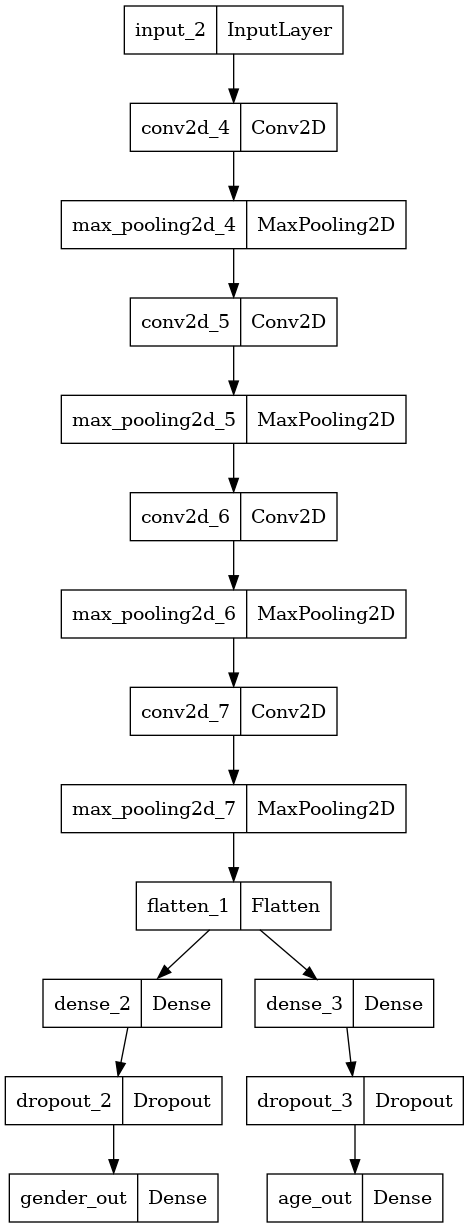

In [37]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [38]:
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)


Epoch 1/30
250/250 [==============================] - 19s 27ms/step - loss: 7.9396 - gender_out_loss: 0.6616 - age_out_loss: 7.2780 - gender_out_accuracy: 0.5959 - age_out_accuracy: 0.1399 - val_loss: 6.5899 - val_gender_out_loss: 0.5739 - val_age_out_loss: 6.0160 - val_gender_out_accuracy: 0.7020 - val_age_out_accuracy: 0.0000e+00
Epoch 2/30
250/250 [==============================] - 5s 21ms/step - loss: 5.2871 - gender_out_loss: 0.5509 - age_out_loss: 4.7362 - gender_out_accuracy: 0.7055 - age_out_accuracy: 0.1186 - val_loss: 7.4282 - val_gender_out_loss: 0.4594 - val_age_out_loss: 6.9688 - val_gender_out_accuracy: 0.8025 - val_age_out_accuracy: 0.0000e+00
Epoch 3/30
250/250 [==============================] - 5s 22ms/step - loss: 4.4075 - gender_out_loss: 0.4889 - age_out_loss: 3.9186 - gender_out_accuracy: 0.7564 - age_out_accuracy: 0.0699 - val_loss: 5.3270 - val_gender_out_loss: 0.3531 - val_age_out_loss: 4.9739 - val_gender_out_accuracy: 0.8690 - val_age_out_accuracy: 0.0000e+00


# Prediction with Test Data

Original Gender: Male Original Age: 10
1/1 [==============================] - 0s 22ms/step
Predicted Gender: Male Predicted Age: 13


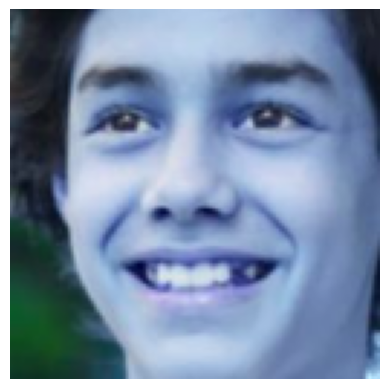

In [42]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 3))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128,3), cmap='gray');

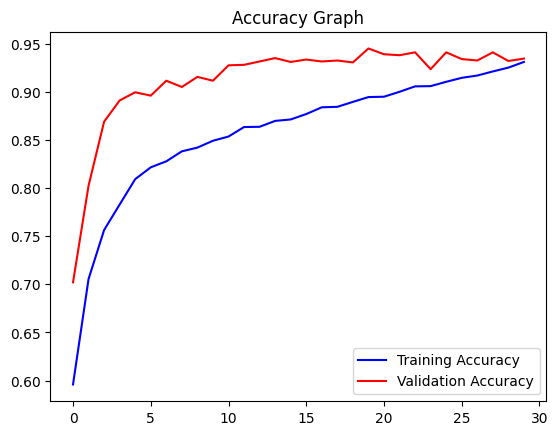

<Figure size 640x480 with 0 Axes>

In [44]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
plt.show()

In [43]:
int(0.0000e+00)

0

In [ ]:
gender_out_accuracy: 0.9310
age_out_accuracy: 0.0069
val_gender_out_accuracy: 0.9345

In [ ]:
val_age_out_accuracy: 0.0000e+00